In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = sns.load_dataset('iris')


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
encoder = LabelEncoder()

In [6]:
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df = df[['sepal_length','petal_length','species']]

In [9]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [12]:
clf = LogisticRegression(multi_class='multinomial')

In [13]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [16]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [20]:
# prediction 
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [22]:
clf.predict(query)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

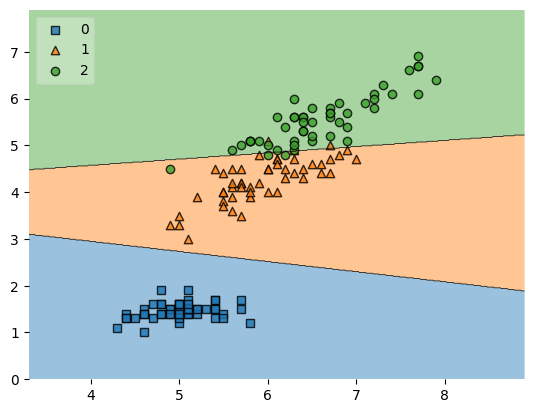

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf,legend =2)